<a href="https://colab.research.google.com/github/jsuj1th/Colab/blob/main/DL/Assignments/DL_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
label_1=[i for i, label in enumerate(train_labels) if label == 1]
label_2=[i for i, label in enumerate(train_labels) if label == 2]
label_3=[i for i, label in enumerate(train_labels) if label == 3]
label_4=[i for i, label in enumerate(train_labels) if label == 4]
label_5=[i for i, label in enumerate(train_labels) if label == 5]
label_6=[i for i, label in enumerate(train_labels) if label == 6]
label_7=[i for i, label in enumerate(train_labels) if label == 7]
label_8=[i for i, label in enumerate(train_labels) if label == 8]
label_9=[i for i, label in enumerate(train_labels) if label == 9]
label_0=[i for i, label in enumerate(train_labels) if label == 0]
labels = [label_0, label_1, label_2, label_3, label_4, label_5, label_6, label_7, label_8, label_9]
pair_list=[]
for i in range(0,10,2):
  print(i, i+1, "\n")
  pair=list(zip(labels[i],labels[i+1]))
  pair_list.append(pair)
# pair=list(zip(label_1,label_2))
# conv_label_1=[]
# for i in pair:
#     img_1=train_images[i[0]]
#     img_2=train_images[i[1]]
#     conv_img=(img_1+img_2)/2
#     conv_label_1.append(conv_img)



0 1 

2 3 

4 5 

6 7 

8 9 



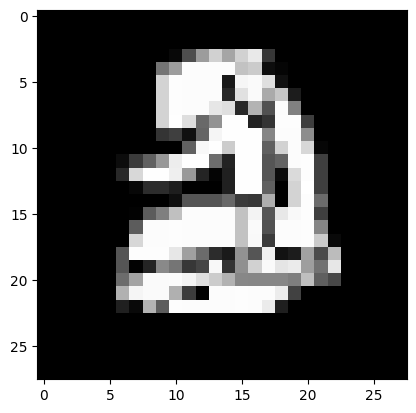

In [10]:


plt.imshow(conv_label_1[5], cmap='gray')
plt.show()
